In [1]:
cd ../system/

/Users/dorislee/Desktop/Research/viz/viz-summarization/system


In [11]:
%pylab inline
%load_ext autoreload
%autoreload 2
from lattice import *
from vizObj import *
from node import * 
from database import *
from vizGeneration import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
df = pd.read_csv("../data/mushrooms.csv")

In [4]:
df.head()

type cap_shape cap_surface cap_color bruises odor gill_attachment  \
0    p         x           s         n       t    p               f   
1    e         x           s         y       t    a               f   
2    e         b           s         w       t    l               f   
3    p         x           y         w       t    p               f   
4    e         x           s         g       f    n               f   

  gill_spacing gill_size gill_color   ...   stalk_surface_below_ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring_number ring_type spore_print_color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [ ]:
attributes = ['cap_surface','cap_color','bruises']

1. determine all possible filters from given attribute names

In [8]:
tablename='mushroom'
filters = {}
for attr in attributes: 
    filters.update(findDistinctAttrVal(attr,tablename))

In [9]:
filters

{'bruises': [u't', u'f'],
 'cap_color': [u'w', u'b', u'u', u'e', u'n', u'g', u'r', u'y', u'c', u'p'],
 'cap_surface': [u'y', u's', u'f', u'g']}

1. ~~determine all possible filters from given attribute names~~
2. __Generate all possible filter combinations__
3. Assign parent child relationships of each node (corresponding to a filter) to generate the lattice

In [10]:
def buildCondition(attribute,value):
    return str(attribute +"="+ value)

In [11]:
import itertools
from itertools import combinations

In [12]:
conditions = [[] for _i in filters.keys()]
for i,attr in enumerate(filters.keys()):
    for val in filters[attr]:
        conditions[i].append(buildCondition(attr,val))
    conditions[i].append("*")

In [13]:
node_filters=[]
for combination in itertools.product(*conditions):
    node_filters.append(combination)

In [14]:
def level(nodeFilter):
    # determine which level a filter lies in
    return len(nodeFilter) - nodeFilter.count('*')

In [15]:
node_filters_levels = np.array([level(nf) for nf in node_filters])
# node_filters = np.array([filter(lambda x: x != '*', a) for a in node_filters])
node_filters = np.array([list(filter(lambda x: x != '*', a)) for a in node_filters])

In [16]:
# print node_filters_levels.count(1)
# print node_filters_levels.count(2)
# #not exactly 16C2 =120 because not all attributes-values are independent, some share the same attributes
# print node_filters_levels.count(3)

In [17]:
idx = np.where(node_filters_levels==1)[0]

In [18]:
prev_level_filters=node_filters[idx]

In [19]:
G = Lattice()
vobj = vizObj(x='type',y='id',filters=['*','*','*'],agg_func='COUNT')
root = vizNode(vobj,None)
G.addNode(root)

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/networkx-1.11-py2.7.egg/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/networkx-1.11-py2.7.egg/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/r

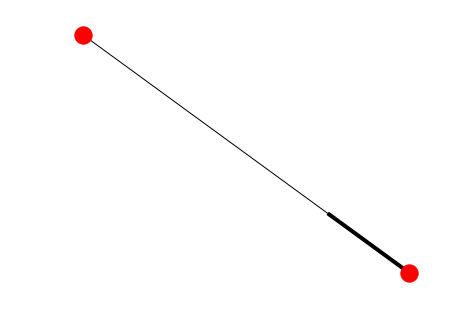

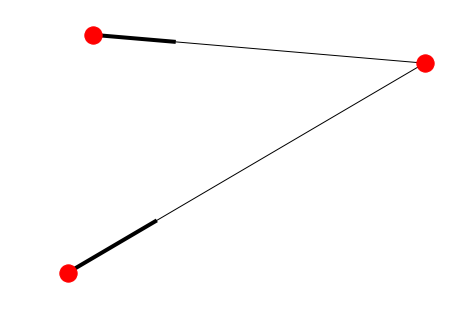

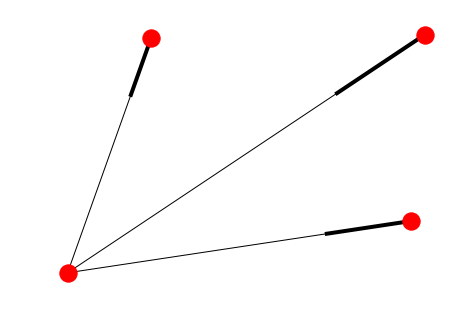

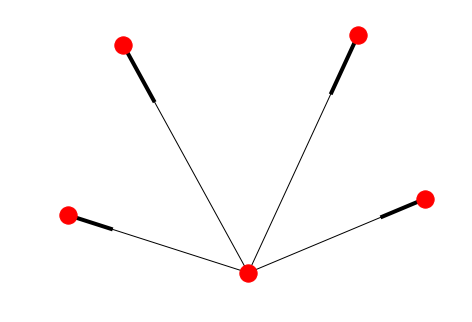

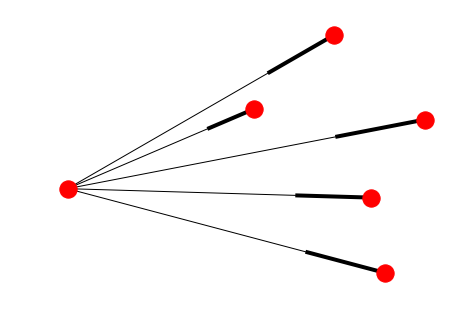

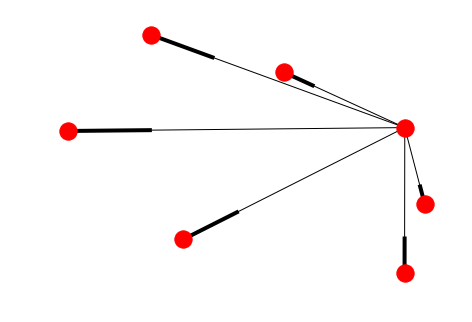

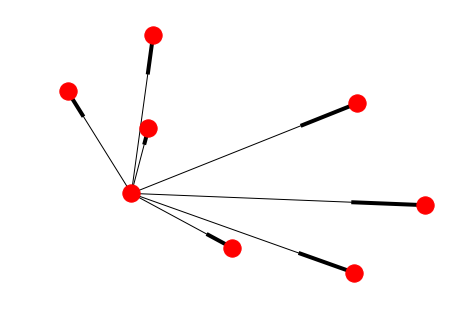

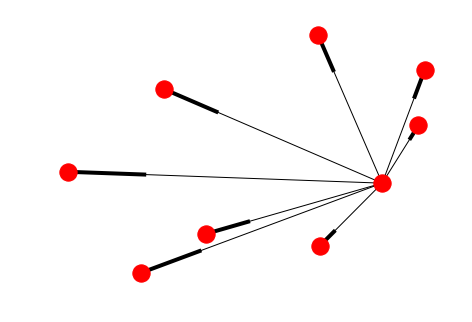

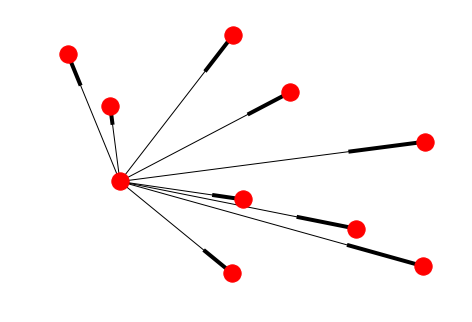

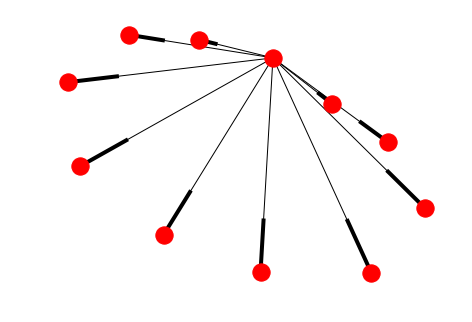

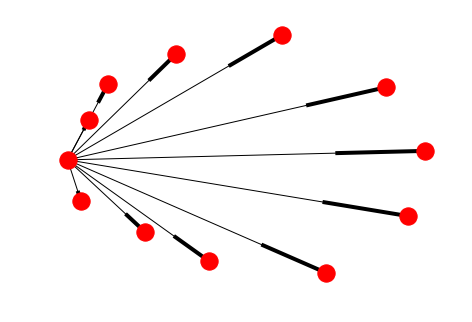

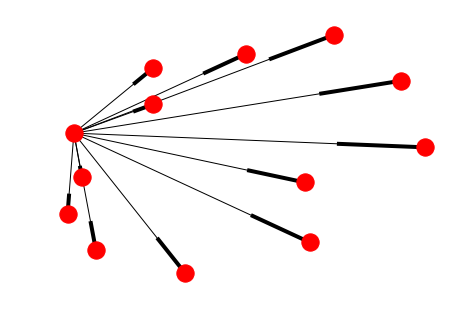

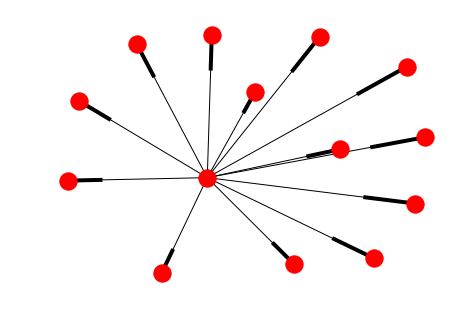

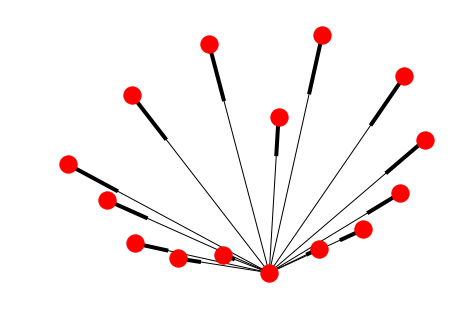

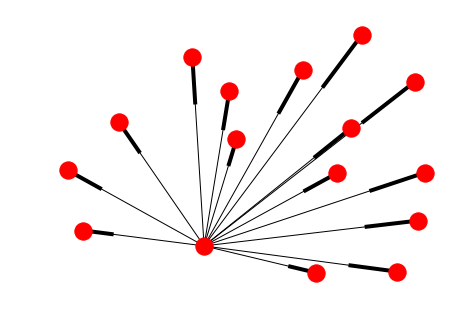

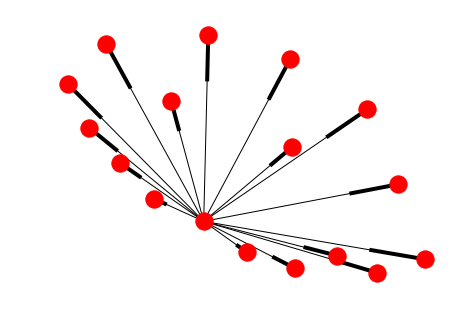

In [20]:
for nf in node_filters[idx]:
#     print nf
    vobj= vizObj(x='type',y='id',filters=list(nf),agg_func='COUNT')
    vnode = vizNode(viz=vobj,parents=[root])
    G.addNode(vnode)
#     print G.graph.node 
#     print "--------"
    #G.graph.add_node(str(list(nf)),vizObj=vnode)
    plt.figure()
    nx.draw(G.graph)

In [21]:
def arr2List(lst):
    return [list(_x) for _x in lst]

In [22]:
idx = np.where(node_filters_levels==2)[0]
level_n_filters=  node_filters[idx]

In [69]:
def findNodeWithFilter(G,filter):
    # return the node with that filter
    for vnode, val in G.graph.node.iteritems():
        if val["filters"]==filter:
            return vnode

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


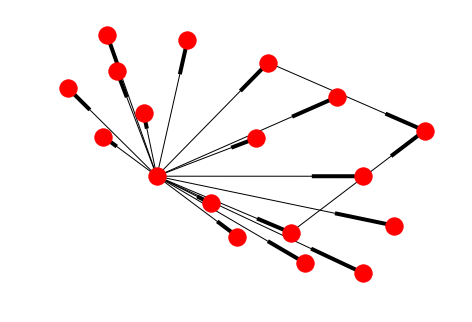

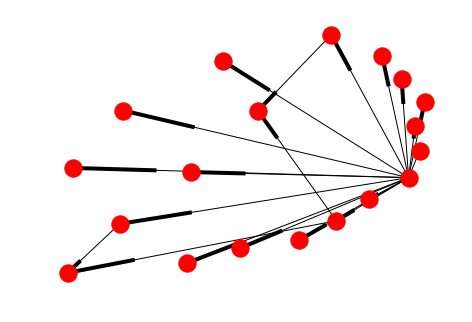

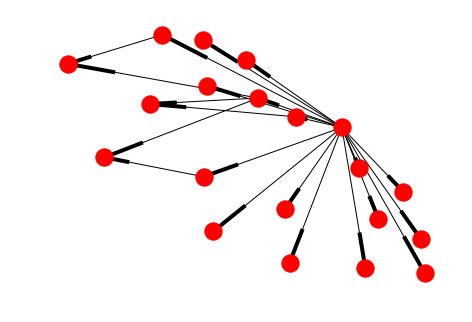

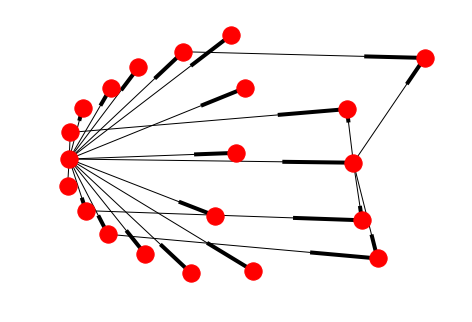

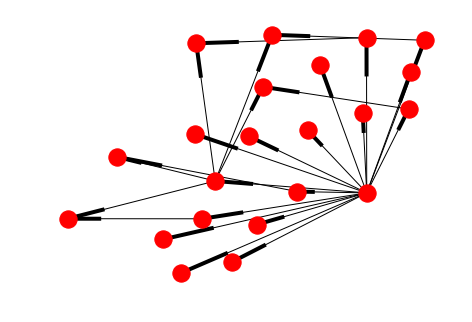

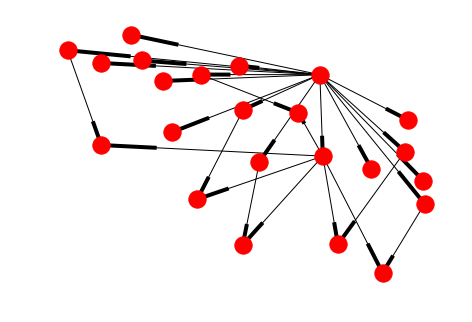

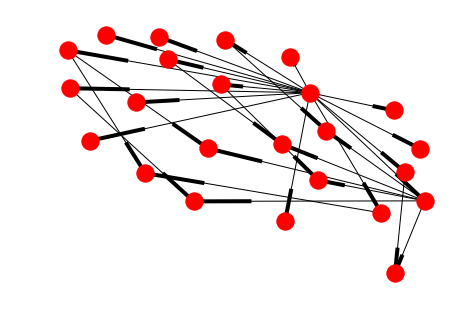

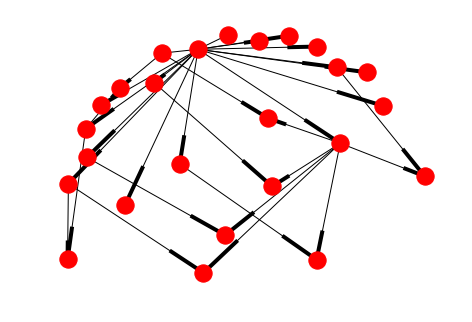

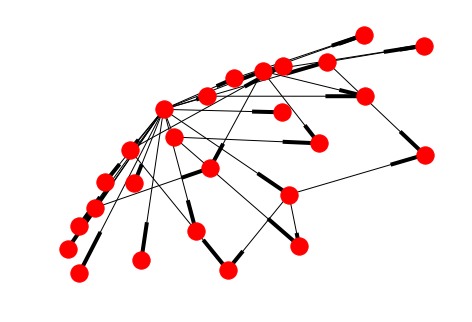

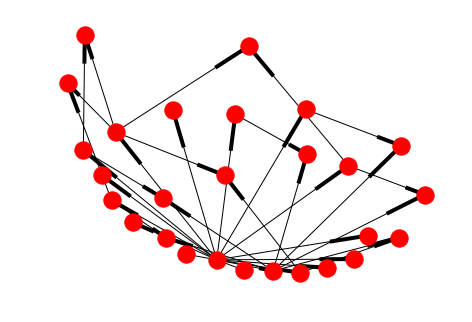

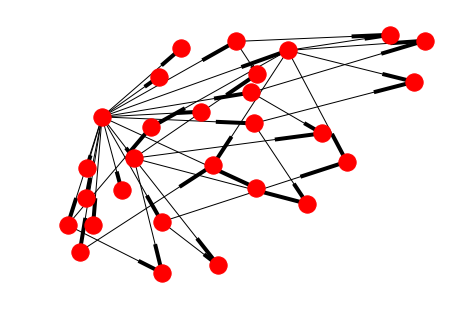

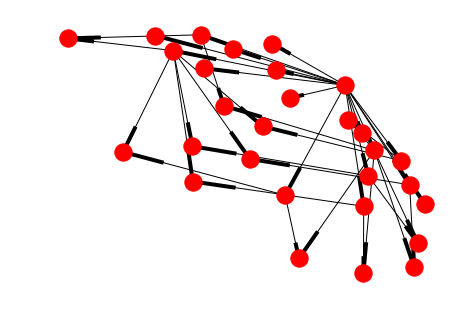

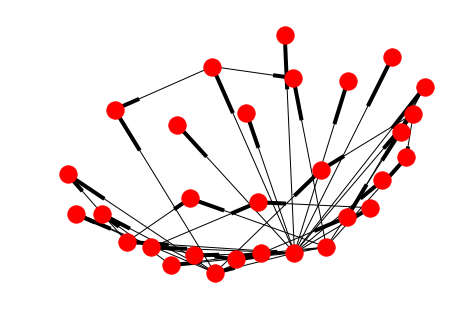

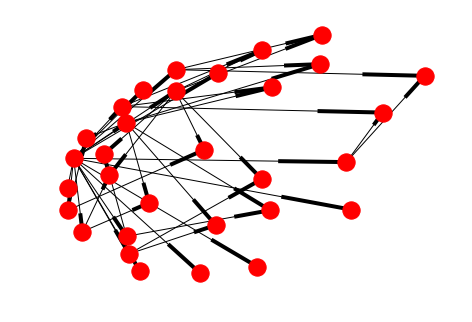

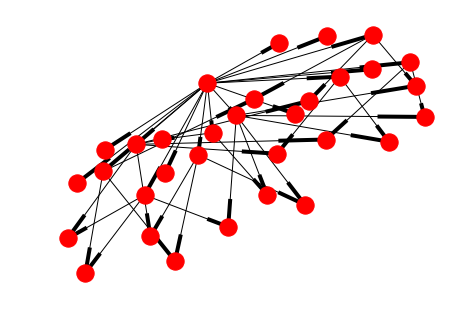

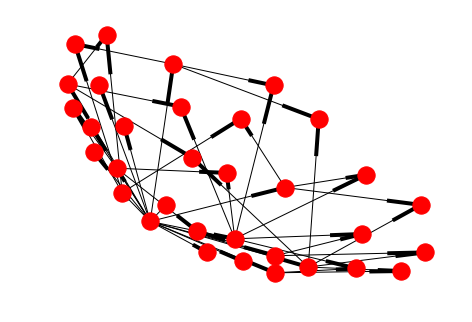

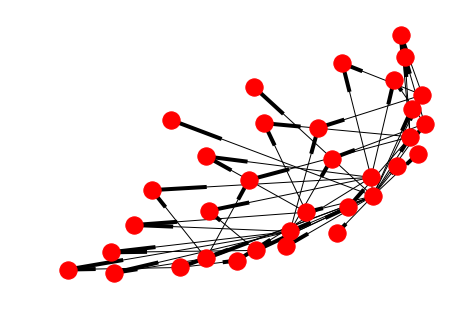

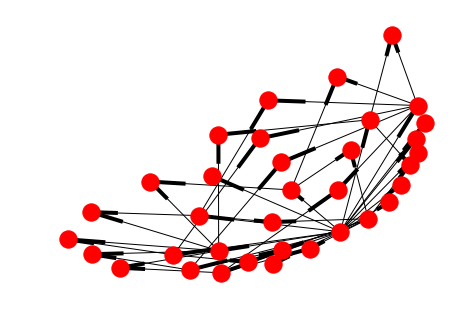

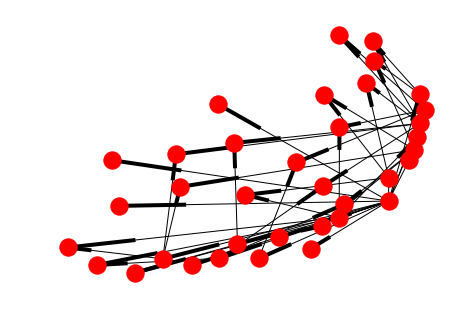

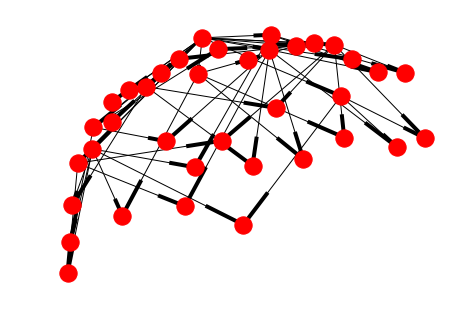

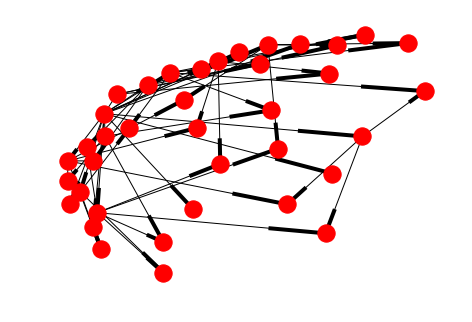

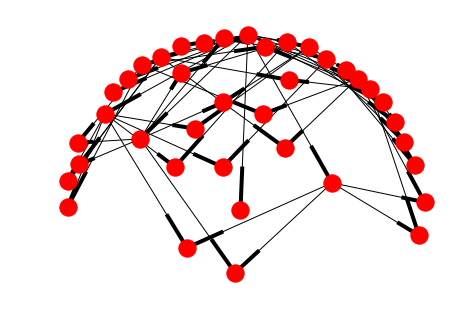

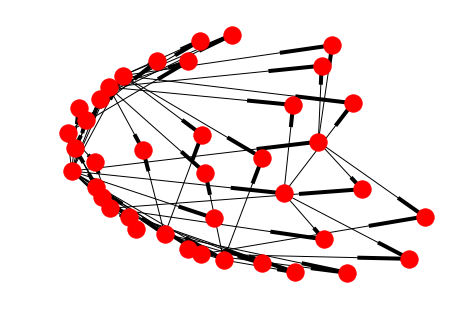

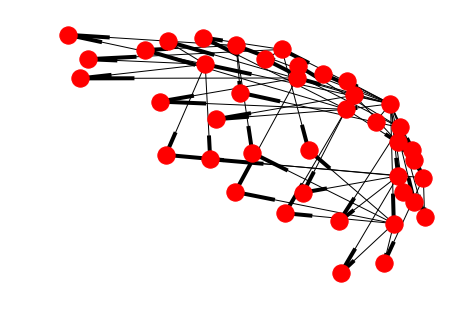

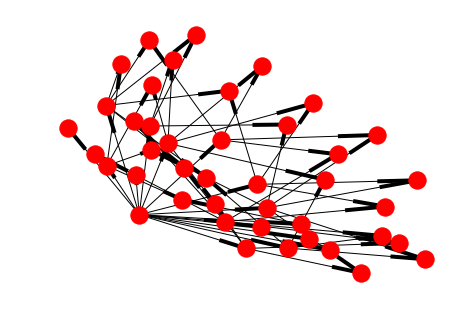

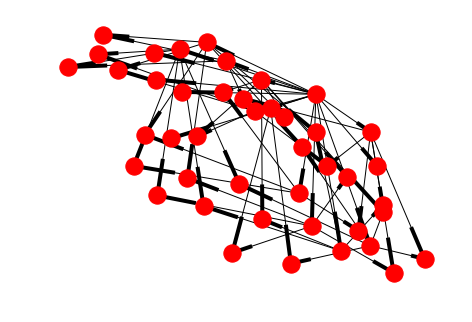

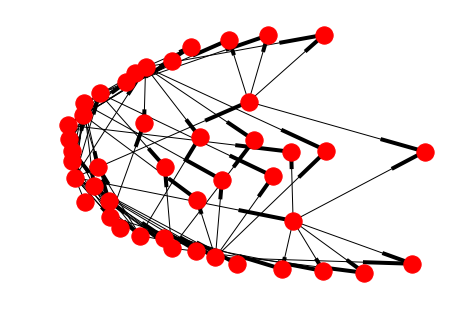

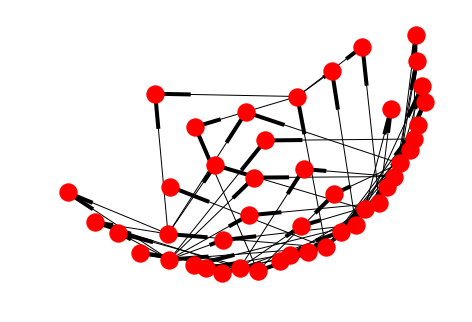

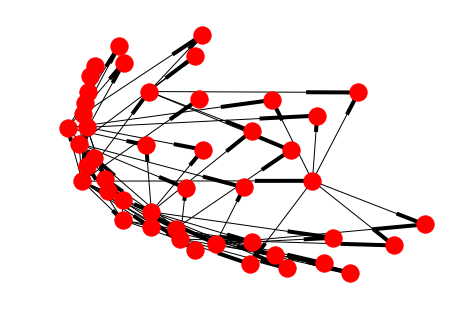

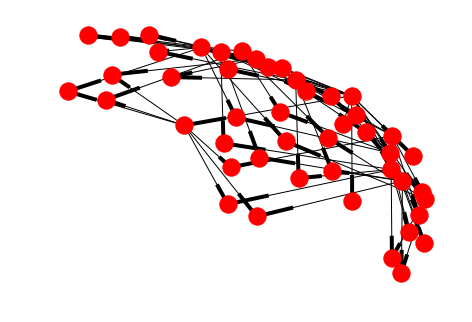

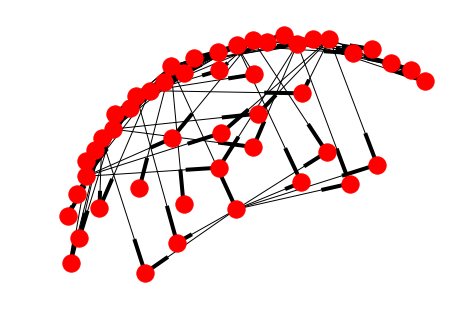

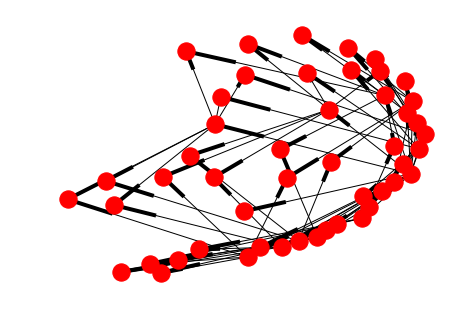

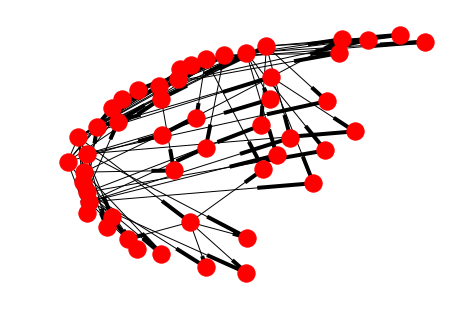

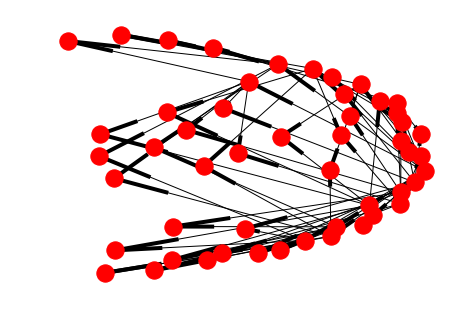

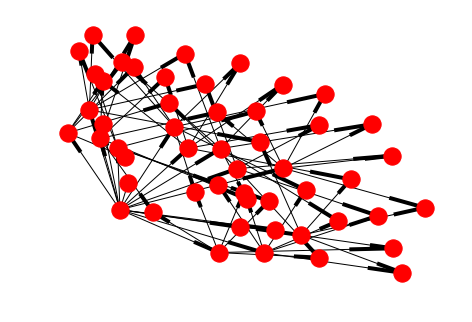

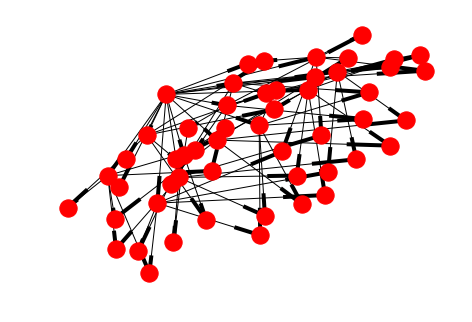

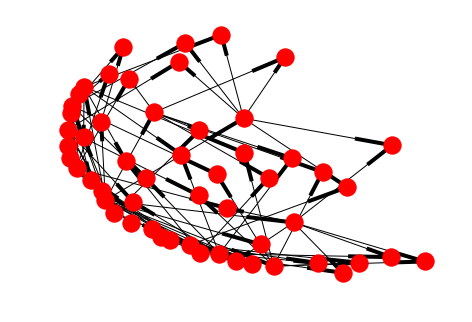

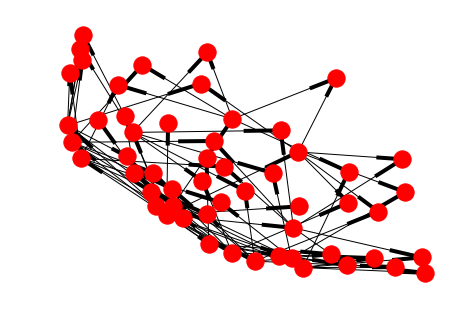

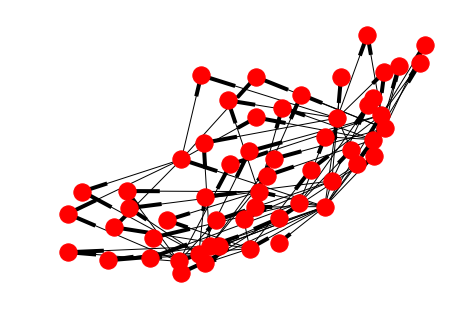

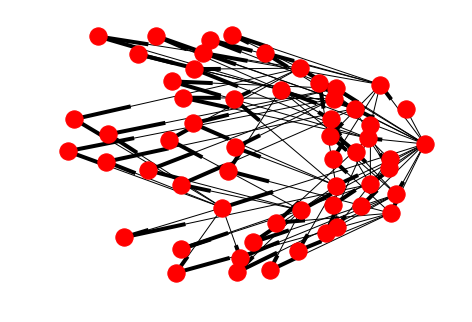

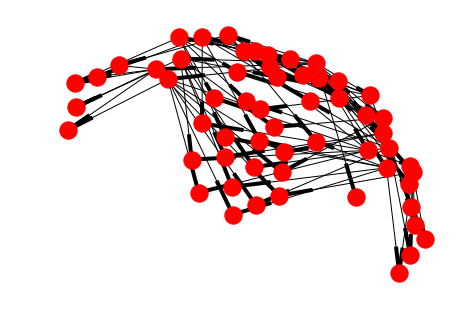

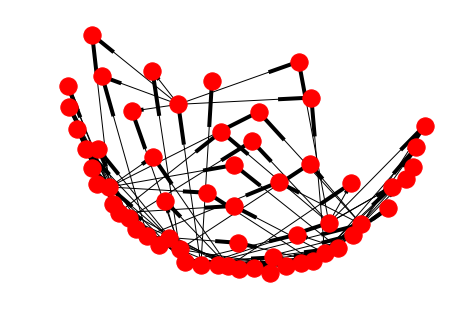

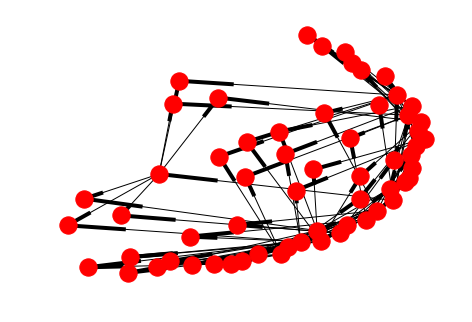

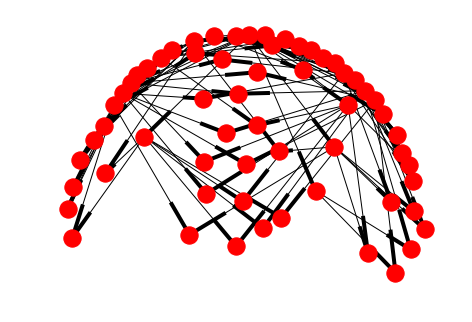

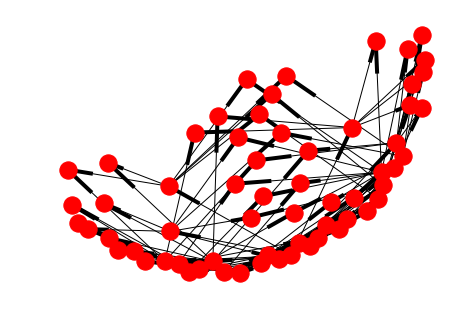

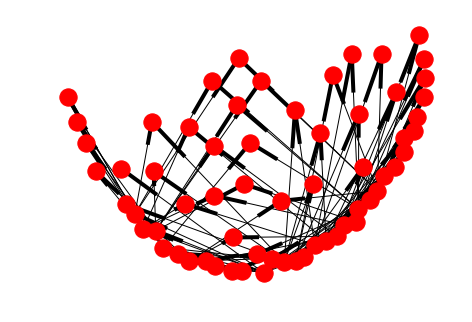

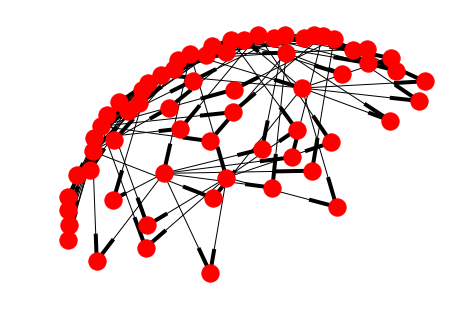

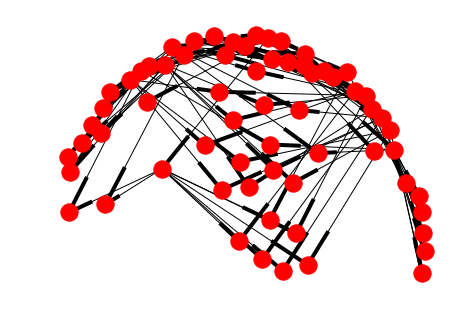

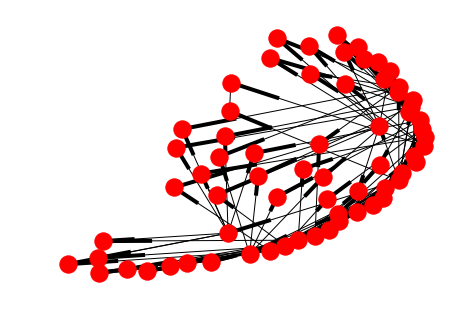

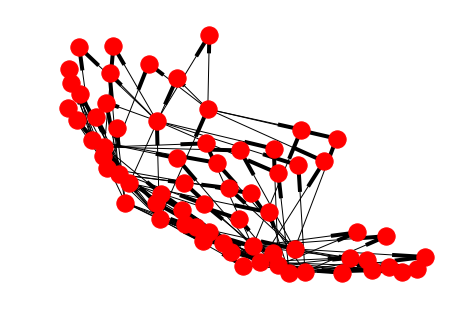

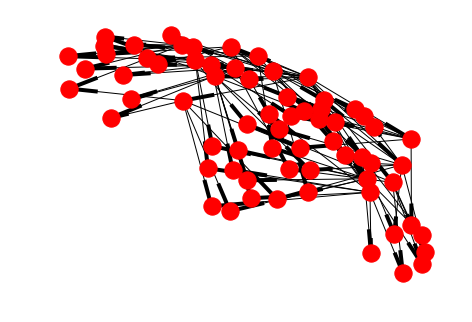

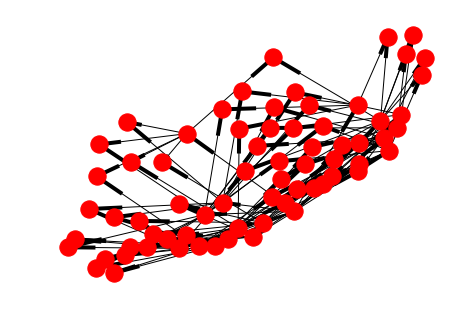

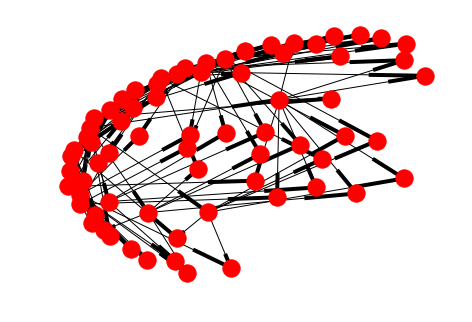

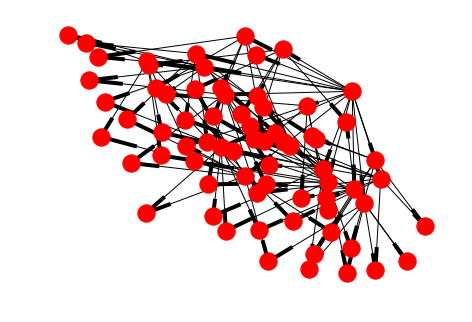

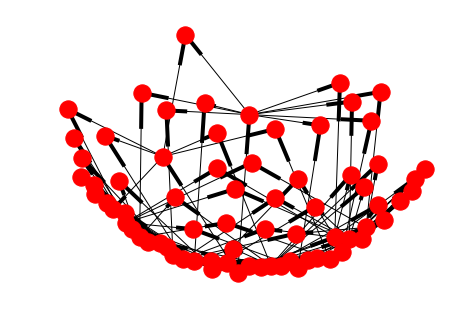

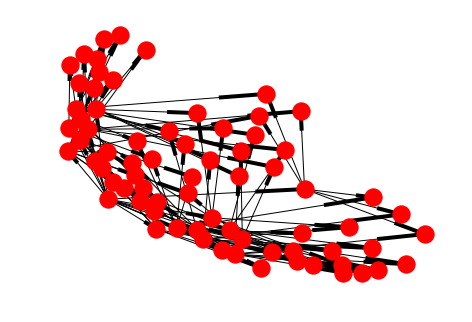

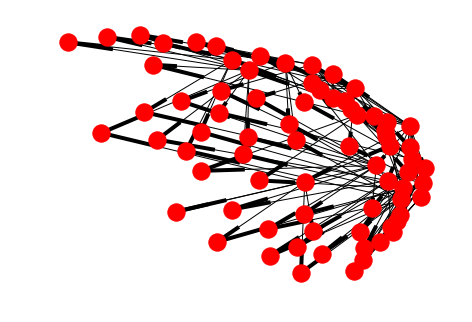

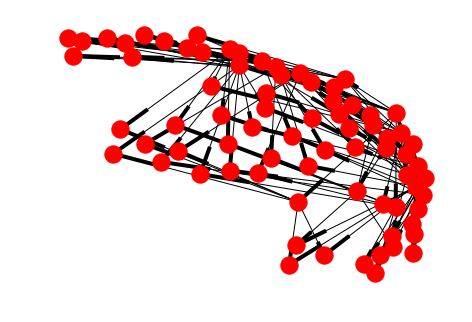

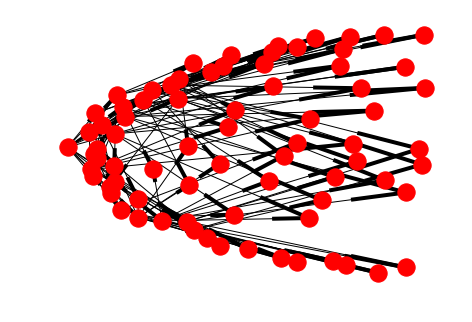

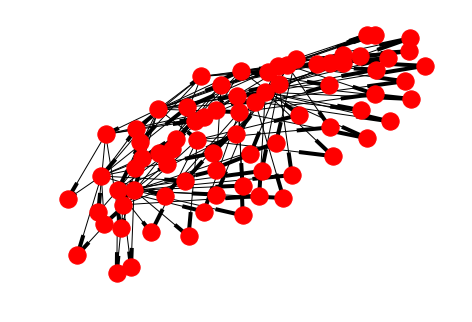

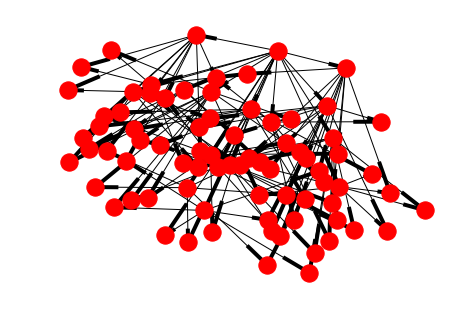

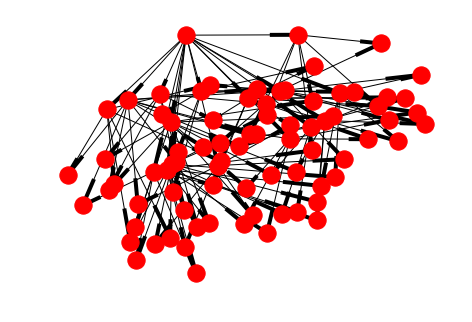

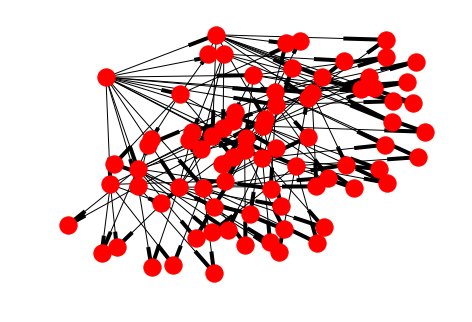

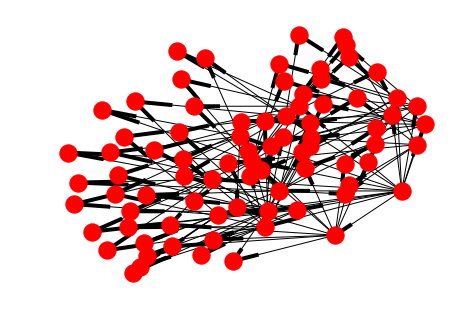

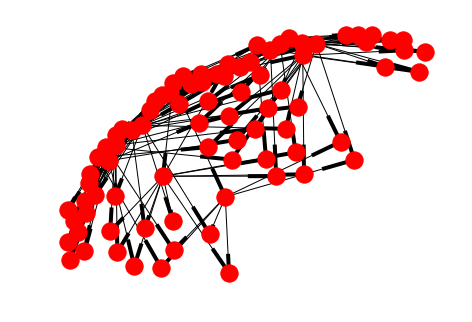

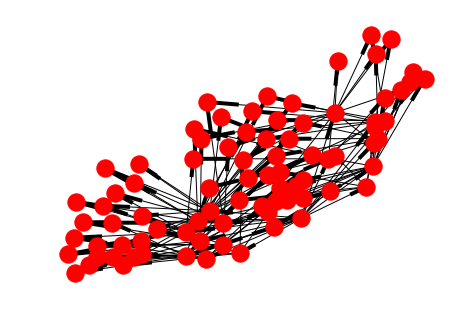

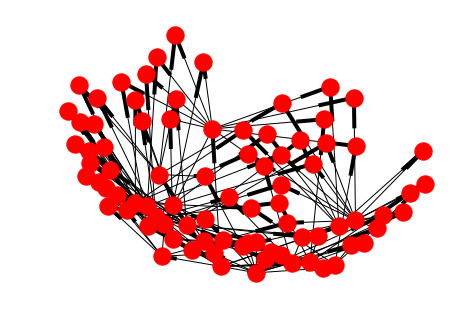

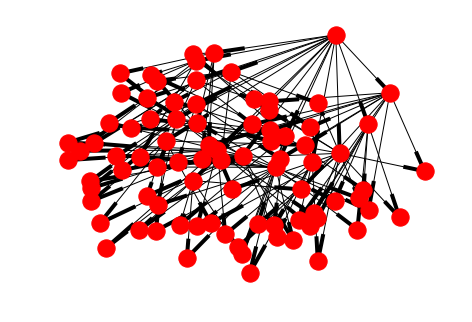

In [30]:
for nf in level_n_filters:
    vobj= vizObj(x='type',y='id',filters=nf,agg_func='COUNT')
    parent_lst = []
    for f in nf:
        if f!="*":
#             parent_idx = np.where([f in x for x in  level_n_filters ])[0]
#             parent_nodes = [x for x in level_n_filters[parent_idx]]
            parent_idx = np.where([f in x for x in  prev_level_filters ])[0]
            parent_nodes = [findNodeWithFilter(G,str(f)) for f in prev_level_filters[parent_idx]]
            parent_lst.extend(parent_nodes)
    vnode = vizNode(viz=vobj,parents=parent_lst)
    G.addNode(vnode)
    
plt.figure()
nx.draw(G.graph)


In [46]:
def generateLattice(xAttr,yAttr,aggrFunc,attributes,tablename,MAX_DEPTH=-1,DEBUG=False):
    '''
    Given a list of categorical attributes, automatically generate 
    lattice structure with appropriate parent child relationship. 
    '''
    if MAX_DEPTH==-1:
        MAX_DEPTH=len(attributes)
    assert MAX_DEPTH<=len(attributes)

    #1. determine all possible filters from given attribute names
    filters = {}
    for attr in attributes: 
        filters.update(findDistinctAttrVal(attr,tablename))
    conditions = [[] for _i in filters.keys()]
    for i,attr in enumerate(filters.keys()):
        for val in filters[attr]:
            conditions[i].append(buildCondition(attr,val))
        conditions[i].append("*")
    # 2. Generate all possible filter combinations
    node_filters=[]
    for combination in itertools.product(*conditions):
        node_filters.append(combination)   
    node_filters_levels = np.array([level(nf) for nf in node_filters])
    # Cleaning out "*" for "all"
    node_filters = np.array([list(filter(lambda x: x != '*', a)) for a in node_filters])
    # 3. Assign parent child relationships of each node (corresponding to a filter) to generate the lattice
    # Base Case: Starting from root --> level 1
    idx = np.where(node_filters_levels==1)[0]
    prev_level_filters=node_filters[idx]
    G = Lattice()
    vobj = vizObj(x=xAttr,y=yAttr,filters=None,agg_func='COUNT',tablename=tablename)
    root = vizNode(vobj,None)
    G.addNode(root)
    for nf in node_filters[idx]:
        vobj= vizObj(x=xAttr,y=yAttr,filters=list(nf),agg_func='COUNT',tablename=tablename)
        vnode = vizNode(viz=vobj,parents=[root])
        G.addNode(vnode)

    if DEBUG: 
        plt.figure()
        plt.title("Level 1")
        nx.draw(G.graph)
        plt.savefig("graph1.png")
    # Level n >2 
    for level_i in range(2,MAX_DEPTH+1):
        idx = np.where(node_filters_levels==level_i)[0]
        level_n_filters=  node_filters[idx]
        for nf in level_n_filters:
            vobj= vizObj(x=xAttr,y=yAttr,filters=nf,agg_func='COUNT',tablename=tablename)
            parent_lst = []
            for f in nf:
                if f!="*":
                    parent_idx = np.where([f in x for x in  prev_level_filters ])[0]
                    parent_nodes = [findNodeWithFilter(G,str(f)) for f in prev_level_filters[parent_idx]]
                    parent_lst.extend(parent_nodes)
            vnode = vizNode(viz=vobj,parents=parent_lst)
            G.addNode(vnode)
        if DEBUG:
            plt.figure()
            plt.title("Level  {}".format(level_i))
            nx.draw(G.graph)
            plt.savefig("graph{}.png".format(level_i))
    return G 

[autoreload of vizGeneration failed: Traceback (most recent call last):
  File "/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "vizGeneration.py", line 103
    
    ^
IndentationError: expected an indented block
]


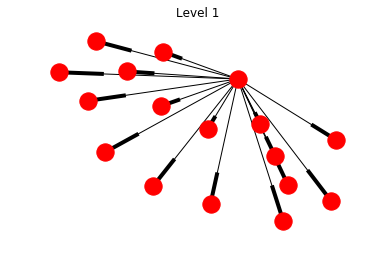

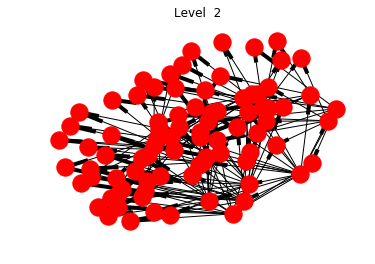

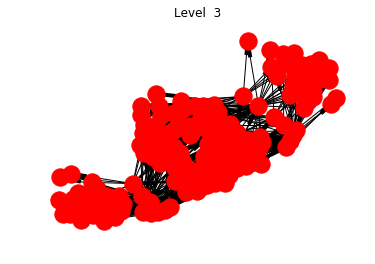

In [50]:
attributes = ['cap_surface','cap_color','bruises']
G = generateLattice('type','*','COUNT',attributes,'mushroom',DEBUG=True)

In [49]:
G

(Nodes: [<vizNode (X: type, Y: *, filters: ["cap_color= 'w'"], data: {'count': [720L, 320L], 'type': [u'e', u'p']})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'u'", "cap_surface= 'g'"], data: {'count': [], 'type': []})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'w'", "bruises= 'f'"], data: {'count': [416L, 64L], 'type': [u'e', u'p']})>, <vizNode (X: type, Y: *, filters: ["bruises= 'f'", "cap_surface= 'g'"], data: {'count': [], 'type': []})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'e'", "bruises= 't'"], data: {'count': [624L], 'type': [u'e']})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'g'", "cap_surface= 'g'"], data: {'count': [], 'type': []})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'y'", "bruises= 't'", "cap_surface= 'y'"], data: {'count': [224L], 'type': [u'e']})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'b'", "bruises= 't'"], data: {'count': [48L, 120L], 'type': [u'e', u'p']})>, <vizNode (X: type, Y: *, filters: ["cap_color= 'p'", "bruises= 